<a href="https://colab.research.google.com/github/Pranjal963/spark-foundation/blob/main/Task_5_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis on Super Market dataset**








---



In [ ]:
#import all neccesary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing csv data
df = pd.read_csv('/content/drive/My Drive/data/SampleSuperstore.csv')

#Have a bird eye view at data

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.duplicated().sum()   #checking for dublicate data

17

In [ ]:
df.drop_duplicates(inplace=True)     #removing dublicate data

In [ ]:
df.duplicated().sum()

0

#Outlier detection

In [ ]:
#select colms which have numbers in its value
ds = df.select_dtypes(include=[np.number])
ds

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [ ]:
#checking for outliers
cols = ds.columns.to_list()
cols

['Sales', 'Quantity', 'Discount', 'Profit']

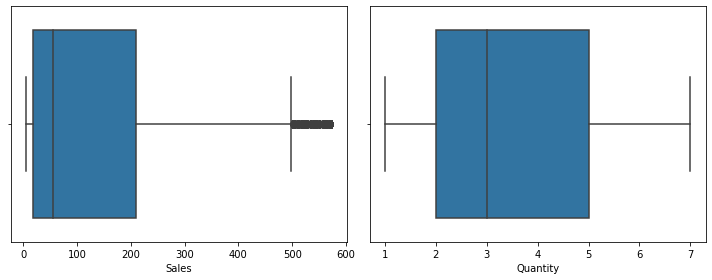

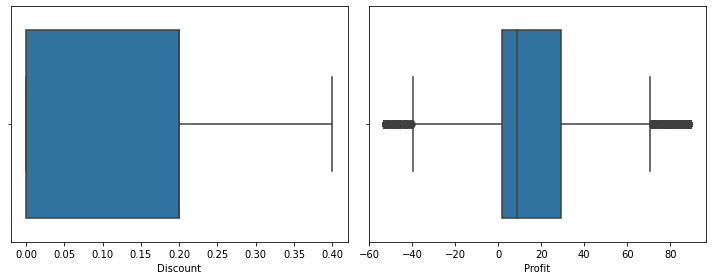

In [ ]:
# taking a list of all the features/columns
#Boxplot of all features to identify outliners
for col in range(0, len(cols), 2):
  if len(cols) > col + 1:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(ds[cols[col]])
    plt.subplot(122)
    sns.boxplot(ds[cols[col + 1]])
    plt.tight_layout()
    plt.show()
  else:
    sns.boxplot(ds[cols[col]])

The Winsorise model works pretty well and treated all the outliers with 100% accuracy. As we don't have any outliers and our data set is processed, it is ready for Exploratory Analysis -

# Let's check correlation between different columns

In [ ]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


#Data Visualisation



In [ ]:
#classes of columns
print('Shiping Mode types: ',df['Ship Mode'].unique())
print('\n')
print('Segment types: ',df['Segment'].unique())
print('\n')
print('Category of products: ',df['Category'].unique())
print('\n')
print('Regions: ',df['Region'].unique())
print('\n')
print('Sub-Categories: ',df['Sub-Category'].unique())

Shiping Mode types:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']


Segment types:  ['Consumer' 'Corporate' 'Home Office']


Category of products:  ['Furniture' 'Office Supplies' 'Technology']


Regions:  ['South' 'West' 'Central' 'East']


Sub-Categories:  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


## Data Visualitation with accordance to sales and profit



In [ ]:
explore_col = ['Ship Mode', 'Segment', 'Region', 'Category']    #object type features which we are going to explore

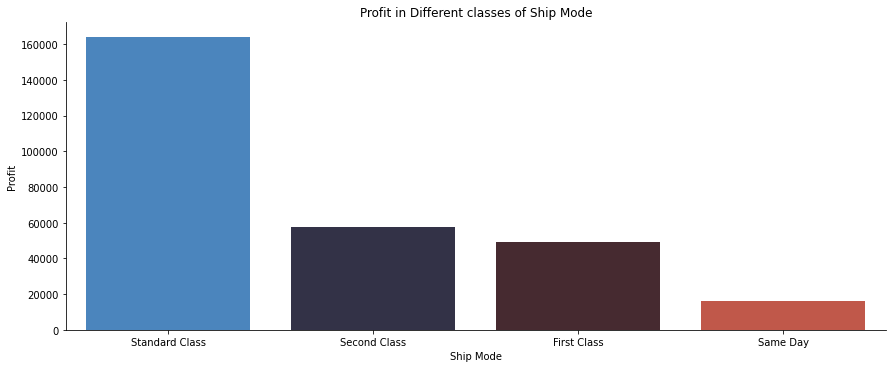

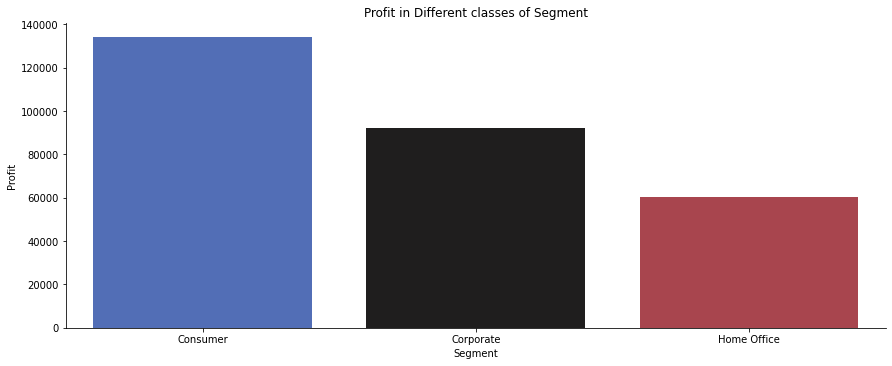

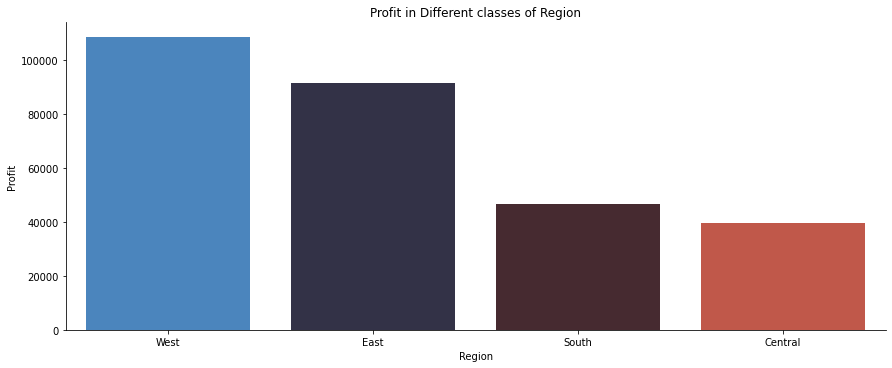

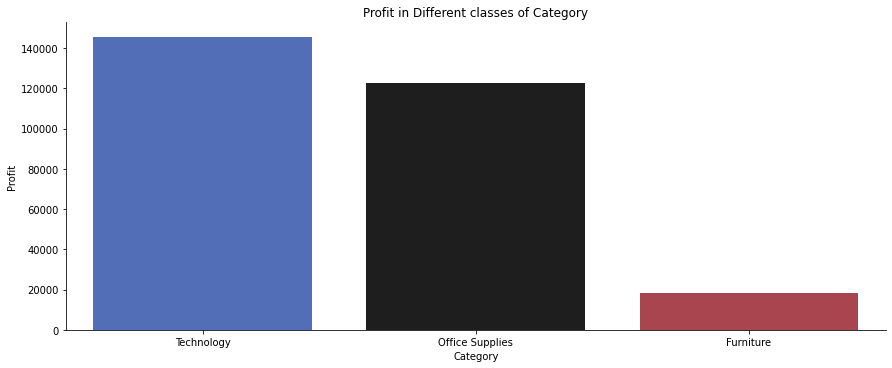

In [ ]:
for i in explore_col:
  un_sor=df.groupby(i)['Profit'].sum().to_frame().reset_index().sort_values(by = 'Profit', ascending = False)
  sns.catplot(x = i, y = 'Profit', data = un_sor, kind = 'bar', aspect = 2.5, palette = 'icefire')
  plt.ylabel('Profit')
  plt.xlabel(i)
  plt.title('Profit in Different classes of {}'.format(i))
  plt.show()
  print('\n')

Sales of different classes of object type features of dataset

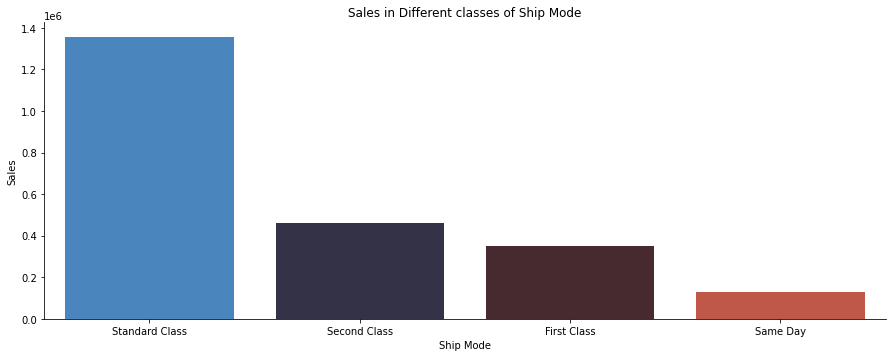

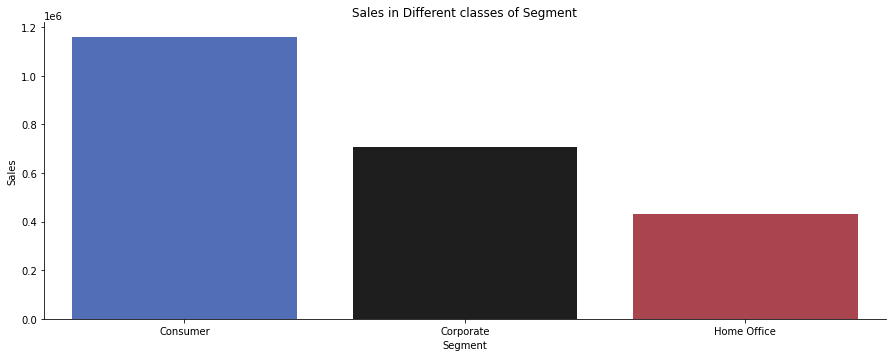

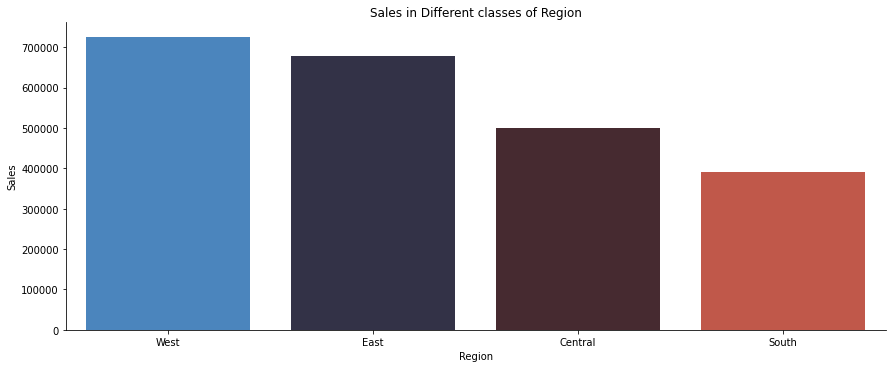

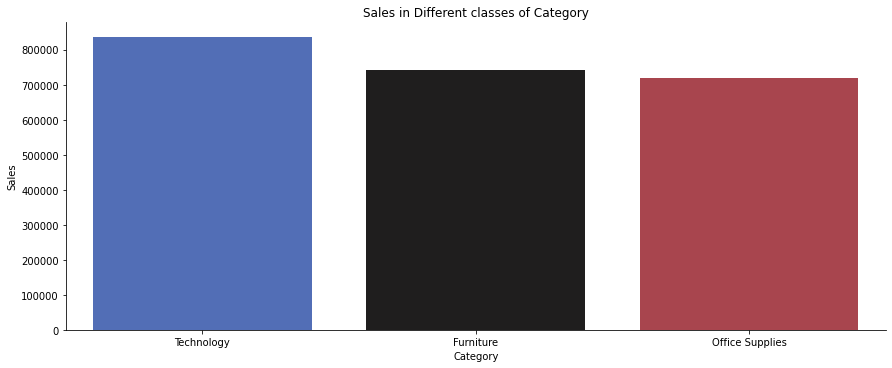

In [ ]:
for i in explore_col:
  un_sor=df.groupby(i)['Sales'].sum().to_frame().reset_index().sort_values(by = 'Sales', ascending = False)
  sns.catplot(x = i, y = 'Sales', data = un_sor, kind = 'bar', aspect = 2.5, palette = 'icefire')
  plt.ylabel('Sales')
  plt.xlabel(i)
  plt.title('Sales in Different classes of {}'.format(i))
  plt.show()
  print('\n')

Counter plot of differet features in object type columns of dataset

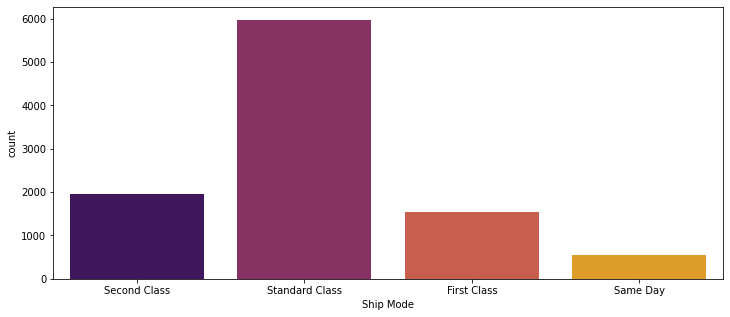

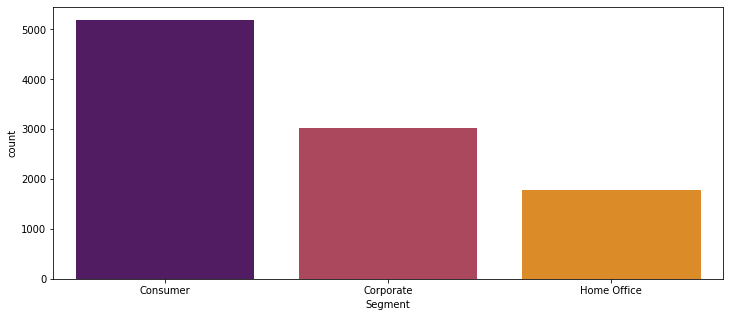

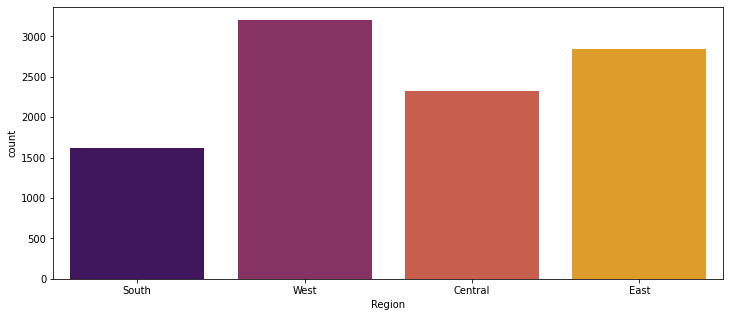

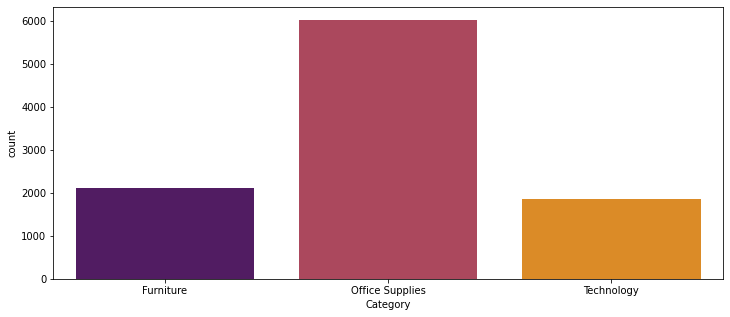

In [ ]:
for i in explore_col:
  plt.figure(figsize=(12,5))
  sns.countplot(df[i], palette='inferno')
  plt.show()


Observations -

In the Ship mode, the Standard Class has the highest count which means the customers give the highest priority to this type of shipping mode.

In Segment, the Consumers have the highest count which means that the consumers do most of the shipping.

From the Regions graph, we observe that the West region has the highest customers count.

From the items category, we observe that the Office Supplies Category has the highest sales count.


##Sub-Category wise data visualisation

Text(0, 0.5, 'Frequency')

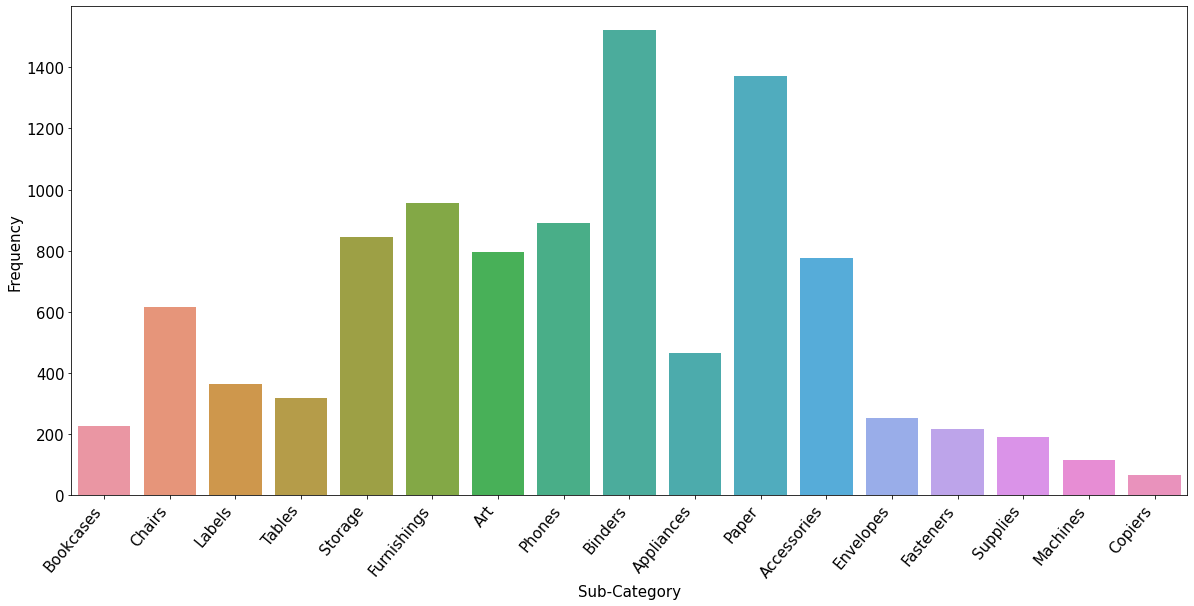

In [ ]:
plt.figure(figsize = (20,9))
sns.countplot(df['Sub-Category'])
plt.xticks(rotation=50, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

In [ ]:
sub = df.groupby('Sub-Category')['Profit'].sum().to_frame().reset_index()
sub = sub.sort_values(by = 'Profit', ascending=False)

Text(0, 0.5, 'Profit')

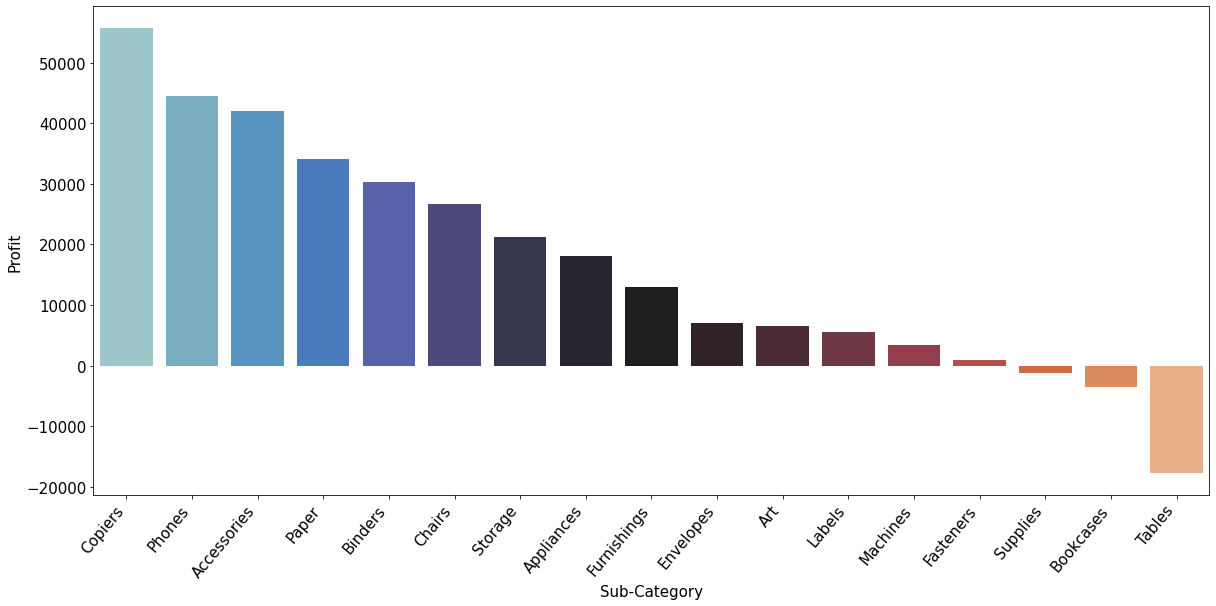

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(x='Sub-Category',y='Profit', data = sub, palette= 'icefire' )
plt.xticks(rotation = 50, ha ='right', fontsize =15)
plt.yticks(fontsize = 15)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Profit', fontsize=15)


Observations -

From the above graph, we observe that some of the top most profitable selling products are Copiers, Phones, Accessories. We also observe that Machines have the lower count as well as profits, hence it is of least value. And Copiers gain higher profits despite having least count.

Also, Supplies, Bookcases and Tables are runing in loss.One should look at the factors which are responsible for this loss.


## State wise data visualisation

In [ ]:
top_sales_state = df.groupby('State')['Sales'].sum().to_frame().reset_index().nlargest(10,'Sales')
print("Top ten states with highest sales :-")
print(top_sales_state)
print('\n')
top_profit_sate = df.groupby('State')['Profit'].sum().to_frame().reset_index().nlargest(10,'Profit')
print("Top ten states with highest profit :-")
print(top_profit_sate)

Top ten states with highest sales :-
           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
8        Florida   89473.7080
11      Illinois   80166.1010
33          Ohio   78258.1360
20      Michigan   76269.6140
44      Virginia   70636.7200


Top ten states with highest profit :-
         State      Profit
3   California  76381.3871
30    New York  74038.5486
45  Washington  33402.6517
20    Michigan  24463.1876
44    Virginia  18597.9504
12     Indiana  18382.9363
9      Georgia  16250.0433
15    Kentucky  11199.6966
21   Minnesota  10823.1874
6     Delaware   9977.3748


Text(0, 0.5, 'Sales')

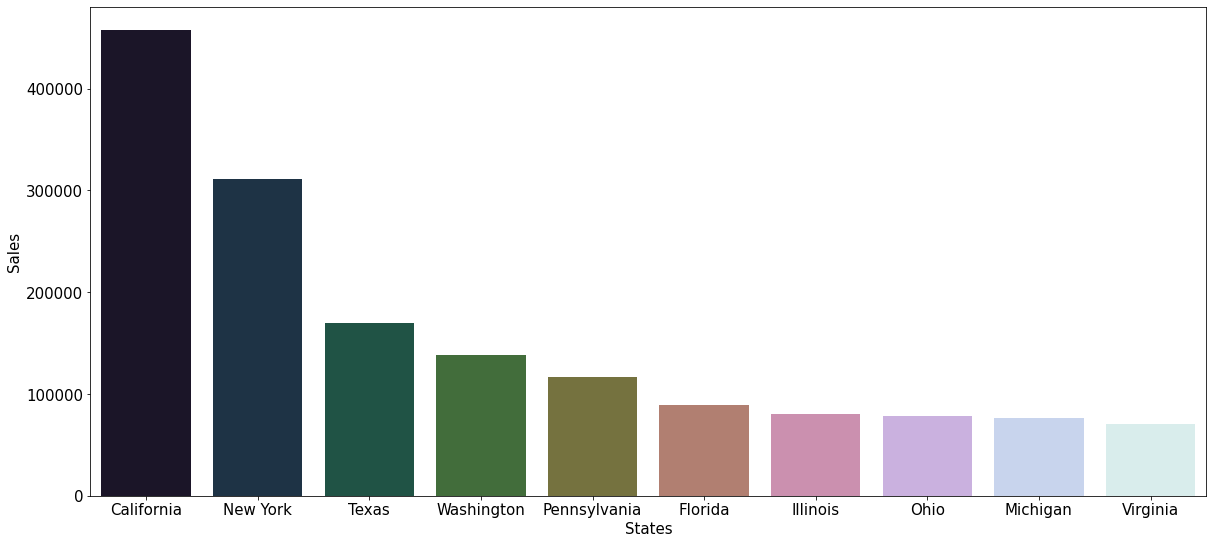

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(x='State',y='Sales', data = top_sales_state, palette= 'cubehelix' )
plt.xticks(fontsize =15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize=15)
plt.ylabel('Sales', fontsize=15)

Text(0, 0.5, 'Profit')

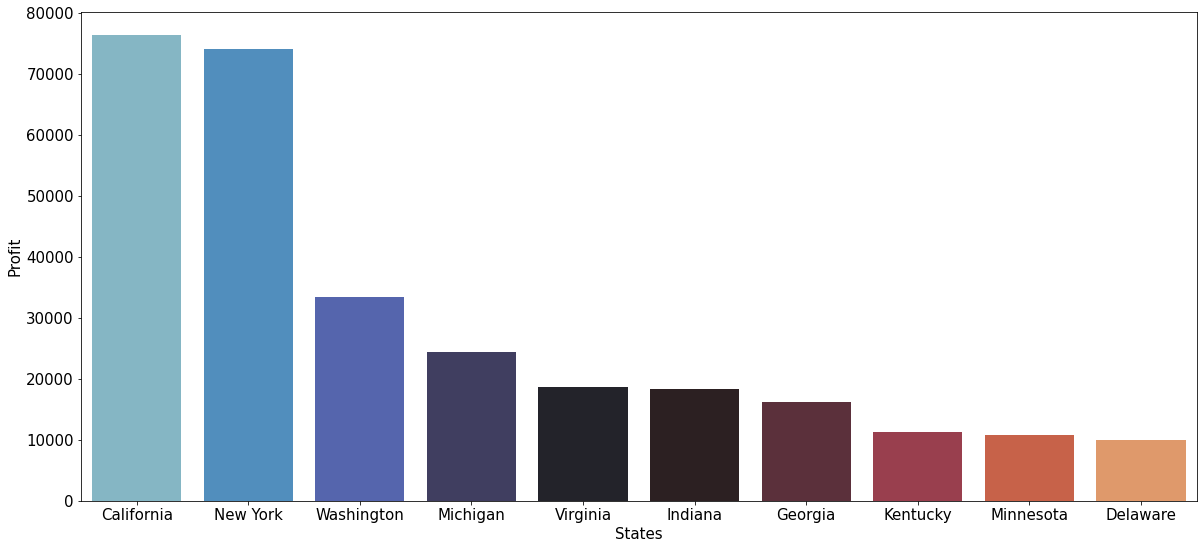

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(x='State',y='Profit', data = top_profit_sate, palette= 'icefire' )
plt.xticks(fontsize =15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize=15)
plt.ylabel('Profit', fontsize=15)


Observations -

We observe that the top-selling states are California, New York and Texas.

And most profitable states are California, New York and Washington.

We can also see there is a negative factor in the states like Texas, Pennsylvania, Florida etc. by which they were not able to come in top 10 most profitable states even tho they are among top 10 states with most sales.

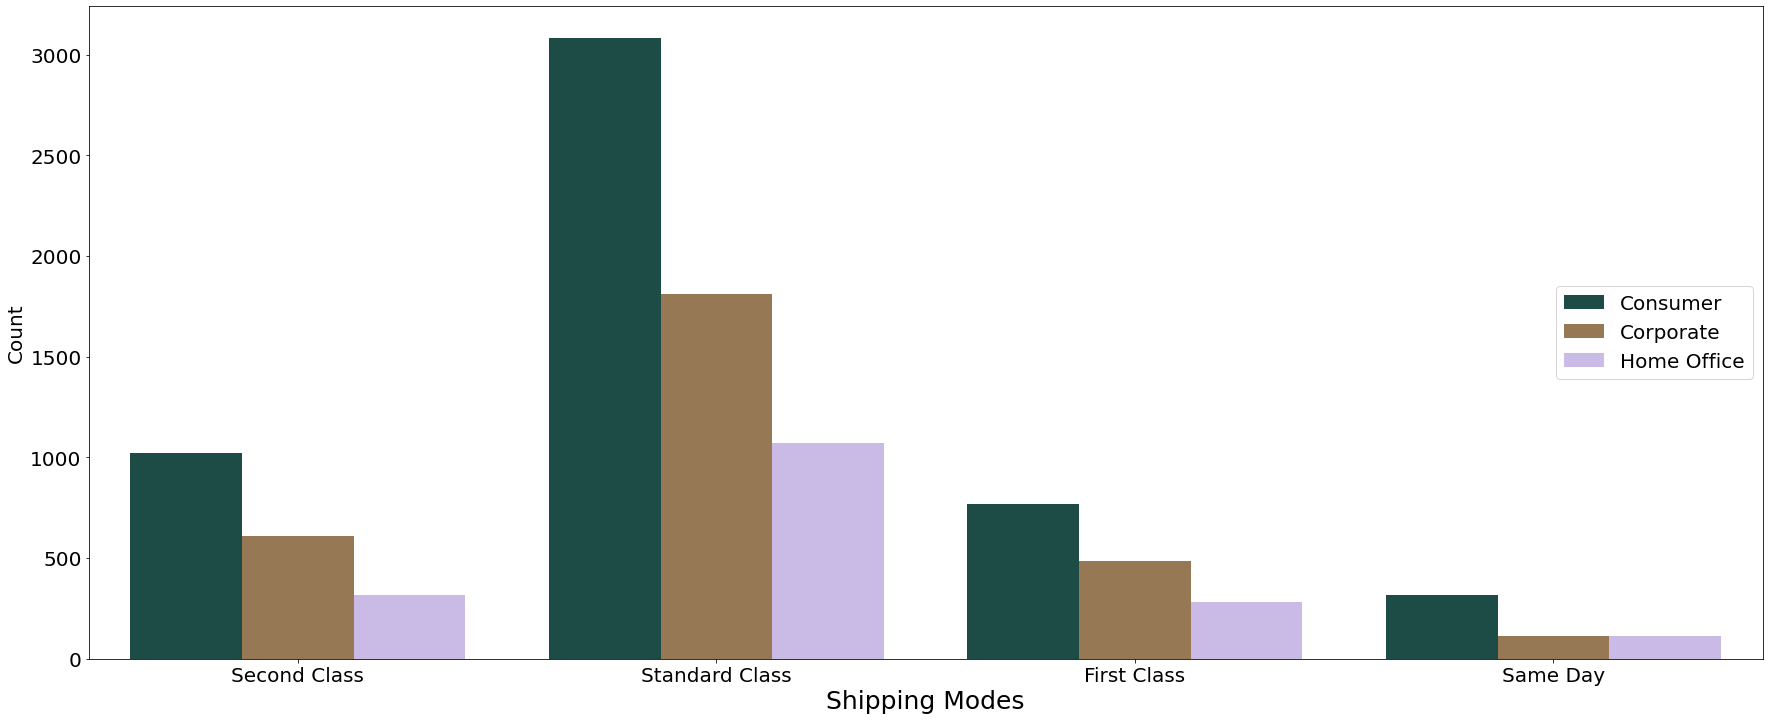

In [ ]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = df, palette = 'cubehelix')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Shipping Modes', fontsize = 25)
plt.ylabel('Count', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)


Observations -

We can see, Standard class is most preferable shipping mode and most of the orders are done by consumers which are followed by corporate.  


##Region-Wise data visualisation



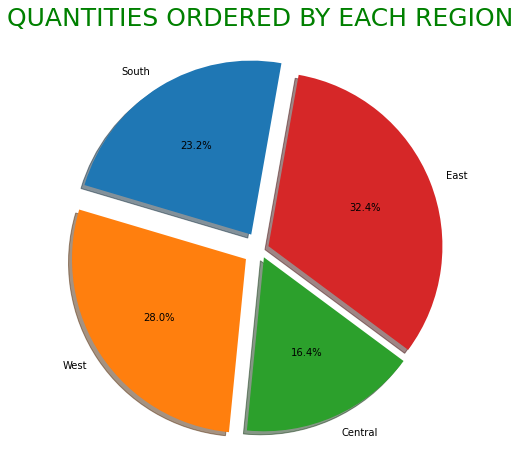

In [ ]:
region = df.groupby('Region')['Quantity'].sum().reset_index()
labels = df['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(region['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('QUANTITIES ORDERED BY EACH REGION',size=25,color = 'green')
plt.show()

From the pie-chart,we observe that most number of quantities ordered are from the West Region.

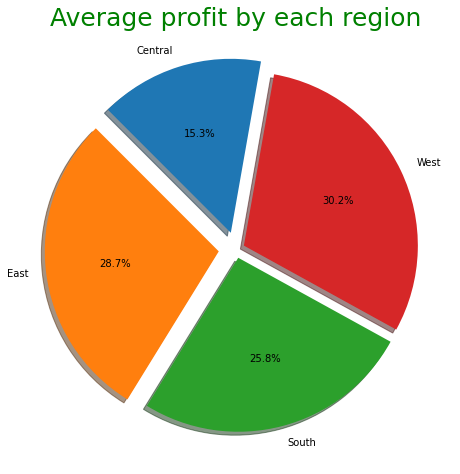

In [ ]:
region = df.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize=(10,8))
plt.pie(region['Profit'],autopct='%1.1f%%',labels=region['Region'].unique(),explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('Average profit by each region',size=25,color = 'green')
plt.show()

From the pie-chart, it is evident that the West region is most profitable while the Central is least profitable.

##Products wise data visualisation

In [ ]:
items = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
items.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


Text(0.5, 6.799999999999997, 'PRODUCTS')

<Figure size 1440x720 with 0 Axes>

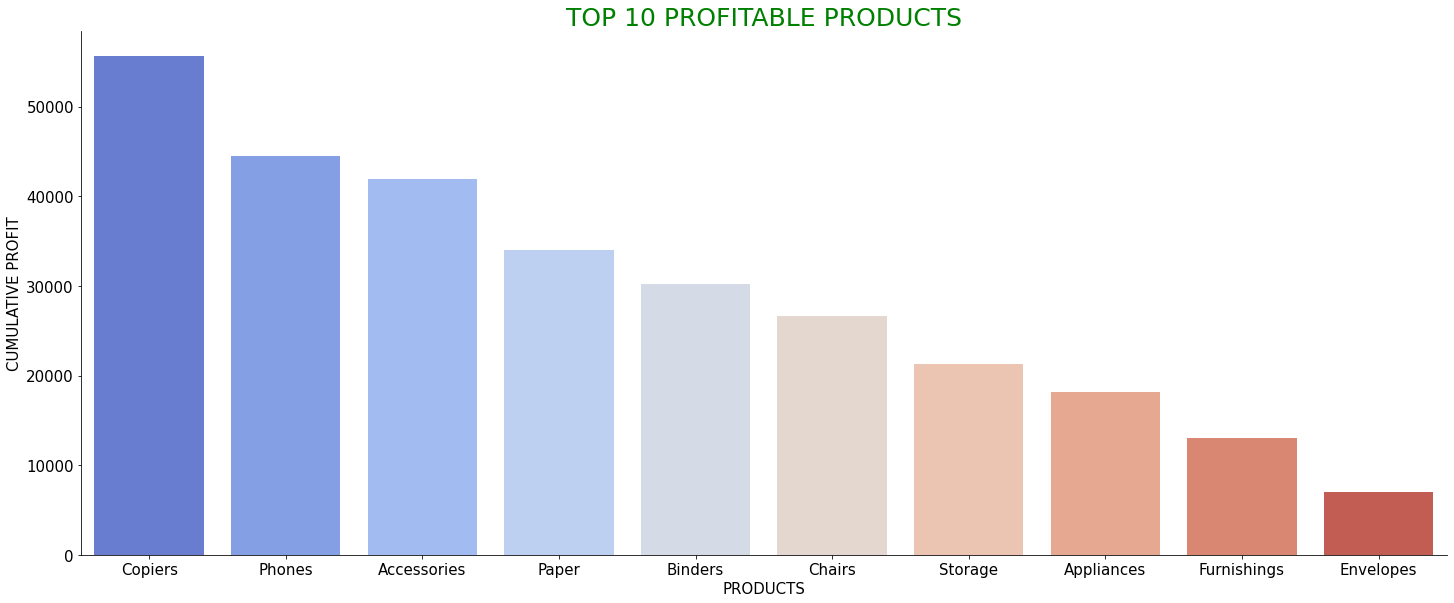

In [ ]:
plt.figure(figsize =(20,10))
sns.catplot('Sub-Category','Profit',data=items.head(10),kind='bar',aspect=2.5,height=8,palette='coolwarm')
plt.title('TOP 10 PROFITABLE PRODUCTS',size=25,color = 'Green')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('CUMULATIVE PROFIT',size=15)
plt.xlabel('PRODUCTS',size=15)



Observation:

  Copiers,Phones and Accessories are most profitable items.

In [ ]:
items = df.groupby('Sub-Category')['Profit'].sum().reset_index().nsmallest(5, 'Profit')
items

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995
8,Fasteners,949.5182
11,Machines,3384.7569


# **Areas where we can improve -**

Since the least profitable sub-category is Tables, Bookcases and Supplies sales team should look at the factors which are harming their profit and should find ways to boost profit.

Since most of the shipping modes preferred are of Standard Class and the least preferred are Same Day & First Class modes, we should dip down their prices to show customers how convenient they are.

The advertisement should be done in the south region to generate awareness about the company.

We can also see there is a negative factor in the states like Texas, Pennsylvania, Florida etc. by which they were not able to come in top 10 most profitable states even tho they are among top 10 states with most sales.

Furniture category is showing least profit, so strategies like bringing new, branded and quality product in this category should be encouraged in the company.


